In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score,accuracy_score, precision_score,recall_score


from keras.datasets import cifar10

import warnings
warnings.filterwarnings('ignore')

c:\Miniconda\envs\cs178\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


60000 images total. We have 10,000 testing images and 50,000 images for training. We further split the 50,000 images into 40,000 images for training and 10,000 images for validation

In [13]:
(X_tr, y_tr), (X_te, y_te) = cifar10.load_data()
seed = 1234 # for reproduction
# Concatenate train and test images
X = np.concatenate((X_tr,X_te))
y = np.concatenate((y_tr,y_te))
# Randomization
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=10000, random_state=seed,shuffle=True)
# size of X_tr = (50000,32,32,3) where (32,32) is size of the image and (3) is red,green,and blue channel values.
# we have 50000 datapoints for training set, and each set will have 32*32*3 = 3072 features. we need to reshape for training 
X_tr = X_tr.reshape(50000,3072)
X_te = X_te.reshape(10000,3072)
y_tr = y_tr.reshape(50000)
y_te = y_te.reshape(10000)

#X_tr_lc is training set with 50000 datapoints for model.selection.learning_curve
X_tr_lc = X_tr
y_tr_lc = y_tr


In [14]:
# Validation sets
X_val = X_tr[40000:50000]
y_val = y_tr[40000:50000]
# Training sets
X_tr = X_tr[:40000]
y_tr = y_tr[:40000]
print(X_tr.shape)
print(y_tr.shape)

(40000, 3072)
(40000,)


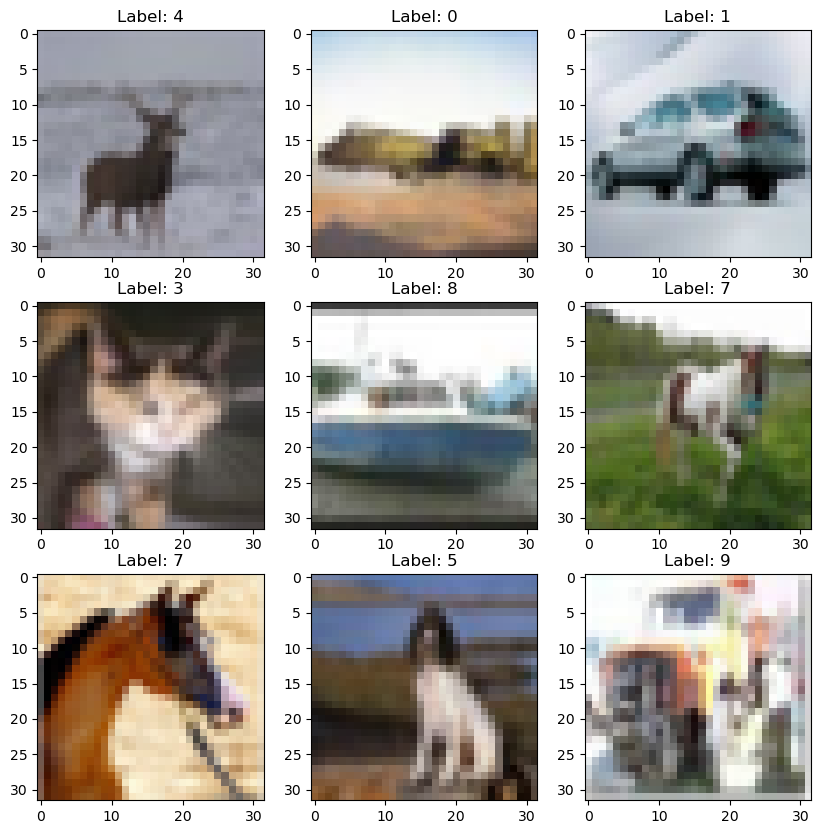

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10)) 

for i in range(9):
    img = X_tr[i]
    axes[i//3, i%3].imshow(img.reshape(32,32,3)) # to show the image, we have to convert 3072 features back to (32,32,3)
    label = y_tr[i] 
    axes[i//3, i%3].set_title(f'Label: {label}') 

In [18]:
# Reshape fit and transform the data for better results
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)
X_val = scaler.transform(X_val)
X_tr_lc = scaler.transform(X_tr_lc)
#Take smaller size of training set for better runtime
#X_tr = X_tr[:5000]
#y_tr = y_tr[:5000]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


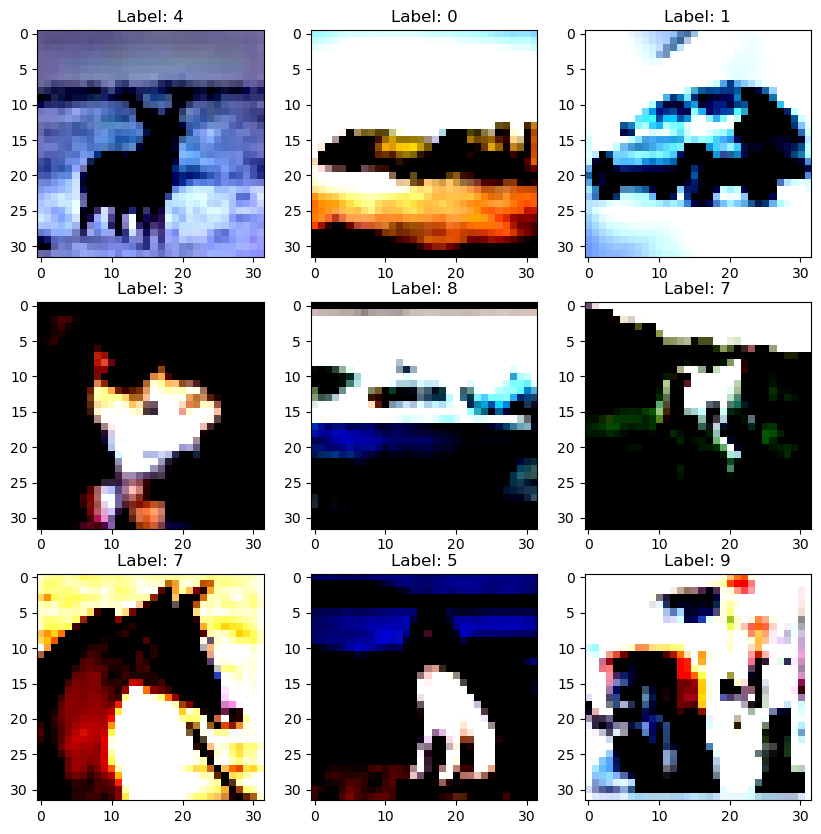

In [17]:
#plot scaled images
fig, axes = plt.subplots(3, 3, figsize=(10, 10)) 

for i in range(9):
    img = X_tr[i]
    axes[i//3, i%3].imshow(img.reshape(32,32,3)) # to show the image, we have to convert 3072 features back to (32,32,3)
    label = y_tr[i] 
    axes[i//3, i%3].set_title(f'Label: {label}') 

1. KNN Classifier

k equals to:  3
Accuracy on validation set: 0.31440
roc_auc_score on validation set: 0.69593
Accuracy on testing set: 0.31870
roc_auc_score on testing set: 0.69747
k equals to:  5
Accuracy on validation set: 0.32360
roc_auc_score on validation set: 0.72370
Accuracy on testing set: 0.33350
roc_auc_score on testing set: 0.72621
k equals to:  7
Accuracy on validation set: 0.32600
roc_auc_score on validation set: 0.73759
Accuracy on testing set: 0.33260
roc_auc_score on testing set: 0.74307
k equals to:  8
Accuracy on validation set: 0.32420
roc_auc_score on validation set: 0.74377
Accuracy on testing set: 0.33560
roc_auc_score on testing set: 0.74830
k equals to:  9
Accuracy on validation set: 0.32260
roc_auc_score on validation set: 0.74883
Accuracy on testing set: 0.33500
roc_auc_score on testing set: 0.75450
k equals to:  10
Accuracy on validation set: 0.32040
roc_auc_score on validation set: 0.75357
Accuracy on testing set: 0.33540
roc_auc_score on testing set: 0.75735
k equals to:  1

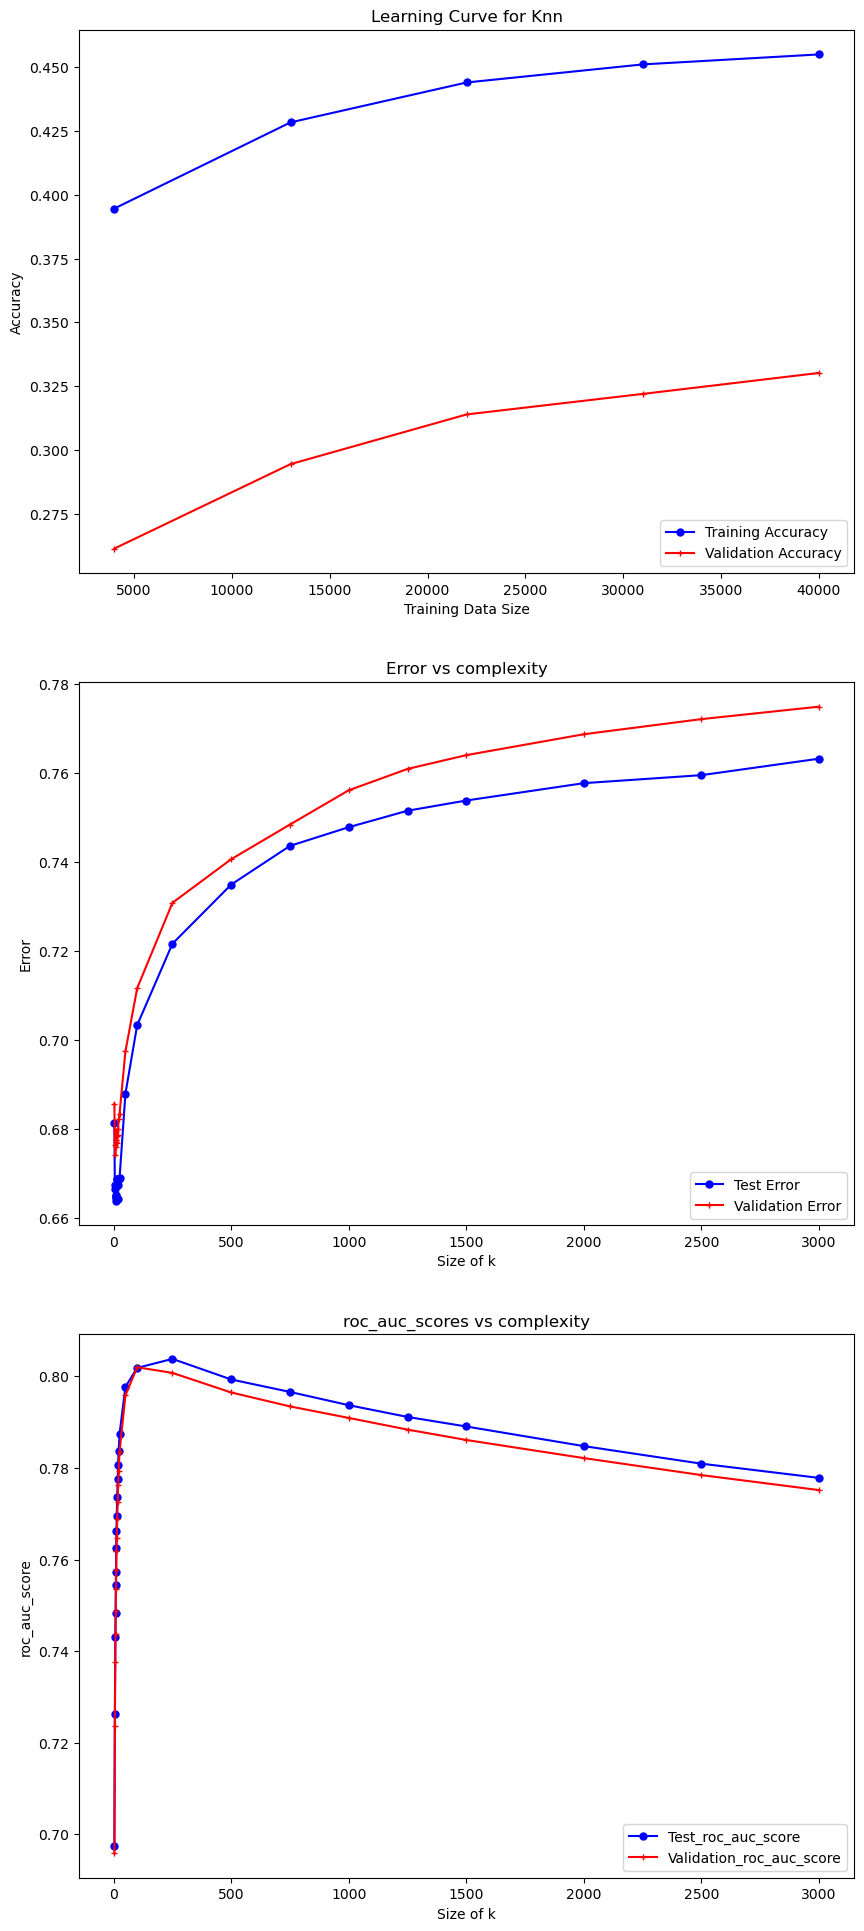

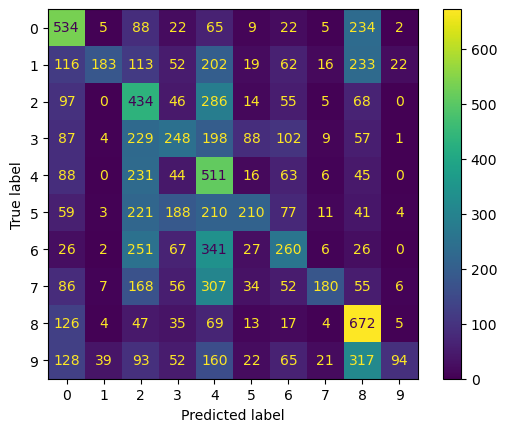

In [19]:
#KNN

fig, axes = plt.subplots(3,1,figsize=(10, 24))

val_error_list = []
te_error_list = []
val_roc_auc_score_list =[]
te_roc_auc_score_list =[]

max_accuracy_index = 0
max_accuracy = 0
best_k_test_accuracy = 0
i = 0
#different hyper parameters
k_list = [3,5,7,8,9,10,11,12,13,15,17,19,21,25,50,100,250,500,750,1000,1250,1500,2000,2500,3000]
for k in k_list:
    print("===============================================")
    print("k equals to: ", k)
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_tr, y_tr)
    # Accuracy/error, ROC AUC score on validation set and testing set
    y_val_scores = knn.predict_proba(X_val)
    y_te_scores = knn.predict_proba(X_te)

    val_accuracy = knn.score(X_val,y_val)
    val_error = 1 - val_accuracy
    val_roc_auc_score = roc_auc_score(y_val,y_val_scores, average='macro',multi_class='ovr')

    te_accuracy = knn.score(X_te,y_te)
    te_error = 1-te_accuracy
    te_roc_auc_score = roc_auc_score(y_te,y_te_scores, average='macro',multi_class='ovr')
    #val_precision = precision_score(y_val, y_val_pred,average='macro')
    #val_recall = recall_score(y_val, y_val_pred,average='macro')
    print('Accuracy on validation set: %.5f' % val_accuracy)
    print('roc_auc_score on validation set: %.5f'% val_roc_auc_score)
    print('Accuracy on testing set: %.5f' % te_accuracy)
    print('roc_auc_score on testing set: %.5f'% te_roc_auc_score)
    val_error_list.append(val_error)
    te_error_list.append(te_error)
    val_roc_auc_score_list.append(val_roc_auc_score)
    te_roc_auc_score_list.append(te_roc_auc_score)
    #determine the best k's index 
    if i == 0:
        max_accuracy = val_accuracy
        best_k_test_accuracy = te_accuracy
    else:
        if(max_accuracy<val_accuracy):
            max_accuracy = val_accuracy
            max_accuracy_index = i
            best_k_test_accuracy = te_accuracy
    i+=1
#end for

best_k = k_list[max_accuracy_index]
print("===============================================")
print("best k is:", best_k,"accuracy on testing set is ", best_k_test_accuracy)
knn = KNeighborsClassifier(n_neighbors=best_k).fit(X_tr, y_tr)
#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=knn, X=X_tr_lc, y=y_tr_lc,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
axes[0].plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes[0].plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes[0].set_title('Learning Curve for Knn')
axes[0].set_xlabel('Training Data Size')
axes[0].set_ylabel('Accuracy')
axes[0].legend(loc='lower right')
#Error vs complexity tradeoffs
axes[1].plot(k_list, te_error_list, color='blue', marker='o', markersize=5, label='Test Error')
axes[1].plot(k_list, val_error_list, color='red', marker='+', markersize=5, label='Validation Error')
axes[1].set_title('Error vs complexity')
axes[1].set_xlabel('Size of k')
axes[1].set_ylabel('Error')
axes[1].legend(loc='lower right')
#roc_auc_scores vs complexity
axes[2].plot(k_list, te_roc_auc_score_list, color='blue', marker='o', markersize=5, label='Test_roc_auc_score')
axes[2].plot(k_list, val_roc_auc_score_list, color='red', marker='+', markersize=5, label='Validation_roc_auc_score')
axes[2].set_title('roc_auc_scores vs complexity')
axes[2].set_xlabel('Size of k')
axes[2].set_ylabel('roc_auc_score')
axes[2].legend(loc='lower right')
#Confusion Matrix for the best k
y_te_pred = knn.predict(X_te)
sklearn_cm = confusion_matrix(y_te, y_te_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()



2.Logistic Regression

Accuracy: 0.28680
Precision: 0.28845
Recall: 0.28723
roc_auc_score: 0.72131


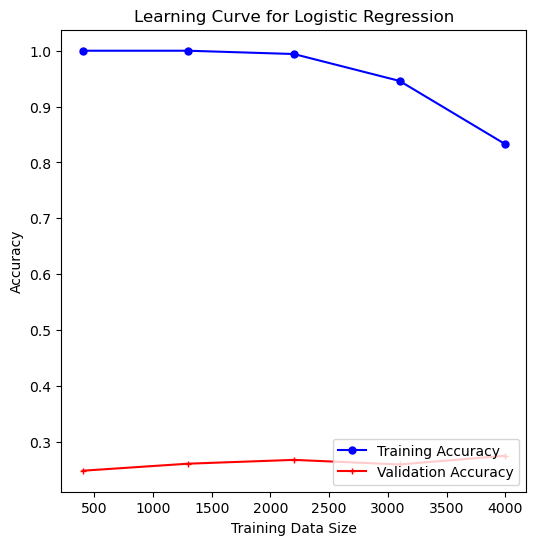

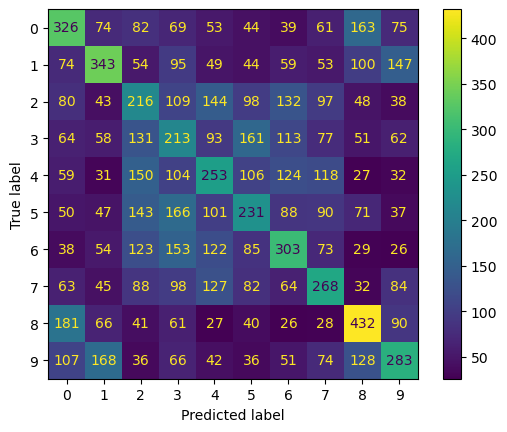

In [30]:
#Logistic Regression

fig, axes = plt.subplots(figsize=(6, 6))
lr = LogisticRegression(random_state=seed).fit(X_tr, y_tr)
#Confusion Matrix
y_te_pred = lr.predict(X_te)
sklearn_cm = confusion_matrix(y_te, y_te_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()
# Accuracy, Precision, Recall, ROC AUC score
y_te_scores = lr.predict_proba(X_te)
print('Accuracy: %.5f' % accuracy_score(y_te, y_te_pred))
print('Precision: %.5f' % precision_score(y_te, y_te_pred,average='macro'))
print('Recall: %.5f' % recall_score(y_te, y_te_pred,average='macro'))
print('roc_auc_score: %.5f'% roc_auc_score(y_te,y_te_scores, average='macro',multi_class='ovr'))

#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=lr, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes.set_title('Learning Curve for Logistic Regression')
axes.set_xlabel('Training Data Size')
axes.set_ylabel('Accuracy')
axes.legend(loc='lower right')



3.clf Neural Network

Accuracy: 0.37240
Precision: 0.37672
Recall: 0.37321
roc_auc_score: 0.79068


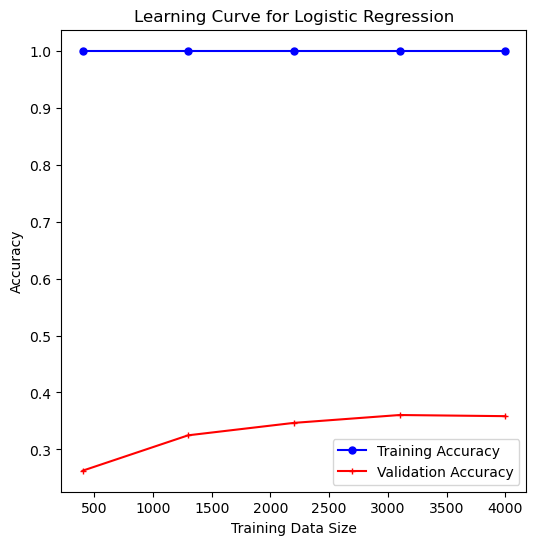

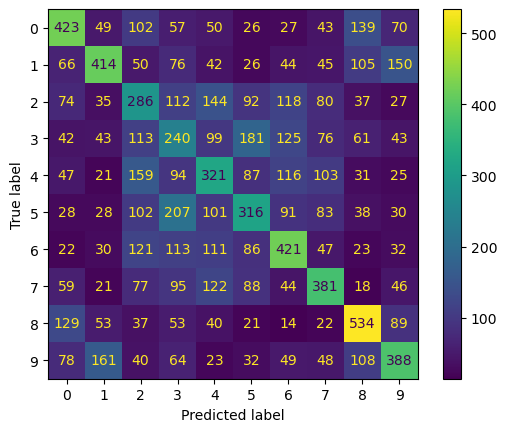

In [32]:
#clf Neural Network

fig, axes = plt.subplots(figsize=(6, 6))
clf = MLPClassifier(hidden_layer_sizes=(64,),activation = 'relu',n_iter_no_change=100,
                    solver='sgd',max_iter=100, learning_rate_init = 0.01, batch_size=256,random_state=seed).fit(X_tr, y_tr)
#Confusion Matrix
y_te_pred = clf.predict(X_te)
sklearn_cm = confusion_matrix(y_te, y_te_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()
# Accuracy, Precision, Recall, ROC AUC score
y_te_scores = clf.predict_proba(X_te)
print('Accuracy: %.5f' % accuracy_score(y_te, y_te_pred))
print('Precision: %.5f' % precision_score(y_te, y_te_pred,average='macro'))
print('Recall: %.5f' % recall_score(y_te, y_te_pred,average='macro'))
print('roc_auc_score: %.5f'% roc_auc_score(y_te,y_te_scores, average='macro',multi_class='ovr'))

#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes.set_title('Learning Curve for Logistic Regression')
axes.set_xlabel('Training Data Size')
axes.set_ylabel('Accuracy')
axes.legend(loc='lower right')


4.Decision tree

Accuracy: 0.22840
Precision: 0.18687
Recall: 0.22919
roc_auc_score: 0.66555


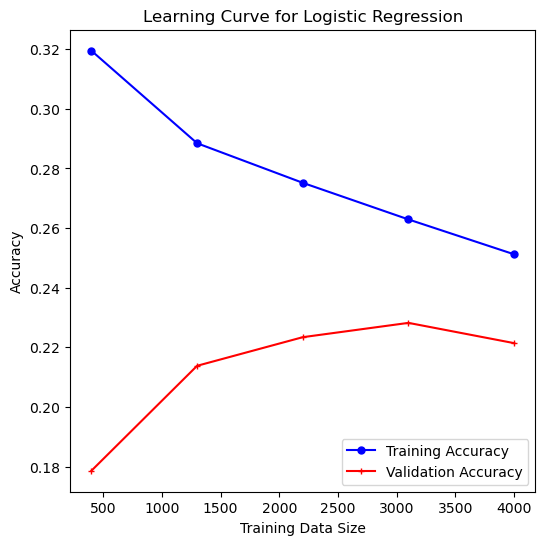

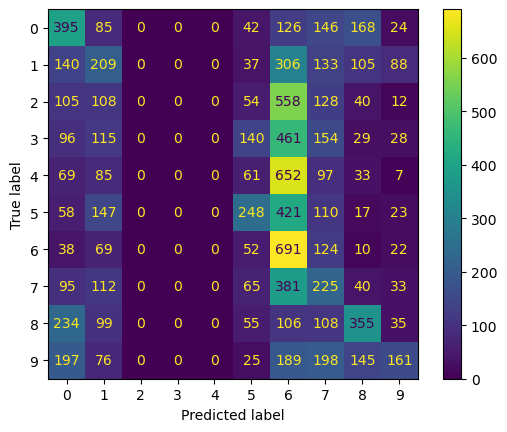

In [33]:
#Decision tree

fig, axes = plt.subplots(figsize=(6, 6))
dtc = DecisionTreeClassifier(max_depth = 3,random_state=seed).fit(X_tr, y_tr)
#Confusion Matrix
y_te_pred = dtc.predict(X_te)
sklearn_cm = confusion_matrix(y_te, y_te_pred)
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot()
# Accuracy, Precision, Recall, ROC AUC score
y_te_scores = dtc.predict_proba(X_te)
print('Accuracy: %.5f' % accuracy_score(y_te, y_te_pred))
print('Precision: %.5f' % precision_score(y_te, y_te_pred,average='macro'))
print('Recall: %.5f' % recall_score(y_te, y_te_pred,average='macro'))
print('roc_auc_score: %.5f'% roc_auc_score(y_te,y_te_scores, average='macro',multi_class='ovr'))

#Learning Curve
train_sizes, train_scores, test_scores = learning_curve(estimator=dtc, X=X_tr, y=y_tr,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

axes.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
axes.plot(train_sizes, test_mean, color='red', marker='+', markersize=5, label='Validation Accuracy')
axes.set_title('Learning Curve for Logistic Regression')
axes.set_xlabel('Training Data Size')
axes.set_ylabel('Accuracy')
axes.legend(loc='lower right')
